In [1]:
# to get started and make sure I have the basic libraries
import numpy as np
import pandas as pd

In [2]:
# The code was removed by Watson Studio for sharing.

,0,1,2,3
0,SEVERITYCODE;X;Y;OBJECTID;INCKEY;COLDETKEY;REP...,None,None,None
1,2;-122.3231484;47.70314032;1;1307;1307;3502005...,FRONT END AT ANGLE;;N;Overcast;Wet;Daylight;;...,None,None
2,1;-122.3472943;47.64717249;2;52200;52200;26079...,LEFT SIDE SIDESWIPE;;0;Raining;Wet;Dark - Str...,None,None
3,1;-122.33454;47.60787143;3;26700;26700;1482393...,REAR END;;0;Overcast;Dry;Daylight;;4323031;;3...,None,None
4,1;-122.3348033;47.60480289;4;1144;1144;3503937...,FRONT END AT ANGLE;;N;Clear;Dry;Daylight;;;;2...,None,None


In [3]:
# to set headers to work with
headers = ["a","b","c","d"]
df.columns = headers

# to split each columns as it contains several values, making df0, 1, 2 and 3
df_a = df["a"].str.split(";", expand = True)
df_b = df["b"].str.split(";", expand = True)
df_c = df["c"].str.split(";", expand = True)
df_d = df["d"].str.split(";", expand = True)

# to join all columns into 1 dataframe
frames = [df_a, df_b, df_c, df_d]
df1 = pd.concat(frames, axis=1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,8,9,10,11,12,13,0,1,2,3
0,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,None,None,None,None,None,None,None,None,None,None
1,2,-122.3231484,47.70314032,1,1307,1307,3502005,Matched,Intersection,37475,...,None,None,None,None,None,None,None,None,None,None
2,1,-122.3472943,47.64717249,2,52200,52200,2607959,Matched,Block,,...,None,None,None,None,None,None,None,None,None,None
3,1,-122.33454,47.60787143,3,26700,26700,1482393,Matched,Block,,...,None,None,None,None,None,None,None,None,None,None
4,1,-122.3348033,47.60480289,4,1144,1144,3503937,Matched,Block,,...,None,None,None,None,None,None,None,None,None,None


In [4]:
# to set column names according to first row headers
df1.columns = df1.iloc[0]
df1.columns

Index([  'SEVERITYCODE',              'X',              'Y',       'OBJECTID',
               'INCKEY',      'COLDETKEY',       'REPORTNO',         'STATUS',
             'ADDRTYPE',         'INTKEY',       'LOCATION',  'EXCEPTRSNCODE',
        'EXCEPTRSNDESC',   'SEVERITYCODE',   'SEVERITYDESC',  'COLLISIONTYPE',
          'PERSONCOUNT',       'PEDCOUNT',    'PEDCYLCOUNT',       'VEHCOUNT',
              'INCDATE',        'INCDTTM',   'JUNCTIONTYPE',   'SDOT_COLCODE',
         'SDOT_COLDESC', 'INATTENTIONIND',      'UNDERINFL',        'WEATHER',
             'ROADCOND',      'LIGHTCOND',  'PEDROWNOTGRNT',     'SDOTCOLNUM',
             'SPEEDING',     'ST_COLCODE',     'ST_COLDESC',     'SEGLANEKEY',
         'CROSSWALKKEY',   'HITPARKEDCAR',             None,             None,
                   None,             None,             None,             None,
                   None,             None,             None,             None,
                   None,             None,          

In [5]:
df2 = df1[['WEATHER', 'ROADCOND', 'LIGHTCOND']]
df3 = df1.iloc[:, 13]

# fixing the severitycode columnname
headers = ["SEVERITYCODE"]
df3.columns = headers

# to join the 4 columns I will work with
frames = [df2, df3]
df4 = pd.concat(frames, axis=1)

# to avoid first row and column names being the same
df4 = df4[df2.WEATHER !='WEATHER']

# to reset the index and avoid old index getting added as a new column
df4.reset_index(drop = True)

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,None,None,None,2
1,None,None,None,1
2,None,None,None,1
3,None,None,None,1
4,None,None,None,2
...,...,...,...,...
194668,None,None,None,2
194669,None,None,None,1
194670,None,None,None,2
194671,Clear,Dry,Dusk,2


In [6]:
df4.shape

(194673, 4)

In [7]:
# dropping NaN's
df4.dropna(subset=["WEATHER", "ROADCOND", "LIGHTCOND"], axis=0, inplace = True)
df5 = df4.dropna(subset=["WEATHER", "ROADCOND", "LIGHTCOND"], axis=0)

df5.shape

(28300, 4)

In [8]:
# dropping other values than NaN which is also useless; unknown, other and '' (empty)
# I tried to do this operation in one cell but that lead to different problems I'm not sure I understand fully why
df6 = df5[df5.WEATHER !="Unknown"]
df6.shape

(25181, 4)

In [9]:
df7 = df6[df6.WEATHER !="Other"]
df7.shape

(25061, 4)

In [10]:
df8 = df7[df7.WEATHER !=""]
df8.shape

(24544, 4)

In [11]:
df9 = df8[df8.LIGHTCOND !="Unknown"]
df9.shape

(24214, 4)

In [12]:
df10 = df9[df9.LIGHTCOND !="Other"]
df10.shape

(24171, 4)

In [13]:
df11 = df10[df10.LIGHTCOND !=""]
df11.shape

(24147, 4)

In [14]:
df12 = df11[df11.ROADCOND !="Unknown"]
df12.shape

(24027, 4)

In [15]:
df13 = df12[df12.ROADCOND !="Other"]
df13.shape

(23988, 4)

In [16]:
df14 = df13[df13.ROADCOND !=""]
df14.shape

(23985, 4)

In [17]:
df14.head()

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
8,Clear,Dry,Daylight,2
33,Clear,Dry,Daylight,1
44,Raining,Wet,Dark - Street Lights On,2
45,Overcast,Wet,Daylight,1
65,Overcast,Dry,Dark - Street Lights On,1


In [18]:
# in regards to balancing checking severitycode
df_sev = df14["SEVERITYCODE"]
df_sev.value_counts().to_frame()

,SEVERITYCODE
1,12897
2,11088


In [19]:
# balancing the severitycode column
df15 = df14.loc[df14['SEVERITYCODE'] == '2']
df16 = df14.loc[df14['SEVERITYCODE'] == '1'].sample(n=len(df15))

In [20]:
# to join the 2 frames again so that I have the balanced df to work with
frames = [df15, df16]
df17 = pd.concat(frames, axis=0)
df17.shape

(22176, 4)

In [21]:
df17.head()

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
8,Clear,Dry,Daylight,2
44,Raining,Wet,Dark - Street Lights On,2
72,Clear,Dry,Daylight,2
85,Clear,Dry,Daylight,2
91,Clear,Dry,Daylight,2


In [22]:
# resetting index
df17.reset_index(drop = True)

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,Clear,Dry,Daylight,2
1,Raining,Wet,Dark - Street Lights On,2
2,Clear,Dry,Daylight,2
3,Clear,Dry,Daylight,2
4,Clear,Dry,Daylight,2
...,...,...,...,...
22171,Raining,Wet,Dark - Street Lights On,1
22172,Raining,Wet,Dark - Street Lights On,1
22173,Raining,Wet,Dark - Street Lights On,1
22174,Overcast,Dry,Daylight,1


In [23]:
df17.dtypes

WEATHER         object
ROADCOND        object
LIGHTCOND       object
SEVERITYCODE    object
dtype: object

In [24]:
# to avoid any potential trouble with the severitycode being of type 'object' -> integer
df17["SEVERITYCODE"] = df17["SEVERITYCODE"].astype("int")
df17.dtypes

WEATHER         object
ROADCOND        object
LIGHTCOND       object
SEVERITYCODE     int64
dtype: object

In [25]:
# use one hot encoding technique to convert object variables to binary variables

df18 = pd.concat([df17,pd.get_dummies(df17['WEATHER'])], axis=1)
# df18 = pd.concat([df17,pd.get_dummies(df17['ROADCOND'])], axis=1)
# df18 = pd.concat([df17,pd.get_dummies(df17['LIGHTCOND'])], axis=1)
df18.head()

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
8,Clear,Dry,Daylight,2,0,1,0,0,0,0,0,0,0
44,Raining,Wet,Dark - Street Lights On,2,0,0,0,0,0,1,0,0,0
72,Clear,Dry,Daylight,2,0,1,0,0,0,0,0,0,0
85,Clear,Dry,Daylight,2,0,1,0,0,0,0,0,0,0
91,Clear,Dry,Daylight,2,0,1,0,0,0,0,0,0,0


In [26]:
df19 = df18[['ROADCOND', 'LIGHTCOND', 'SEVERITYCODE', 'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing']]

In [27]:
df20 = pd.concat([df19,pd.get_dummies(df19['ROADCOND'])], axis=1)
df20.head()

,ROADCOND,LIGHTCOND,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
8,Dry,Daylight,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0
44,Wet,Dark - Street Lights On,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
72,Dry,Daylight,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0
85,Dry,Daylight,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0
91,Dry,Daylight,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
df21 = df20[['LIGHTCOND', 'SEVERITYCODE', 'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Wet']]

df21.shape

(22176, 15)

In [29]:
df22 = pd.concat([df21,pd.get_dummies(df19['LIGHTCOND'])], axis=1)
df22.head()

,LIGHTCOND,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,...,Sand/Mud/Dirt,Snow/Slush,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
8,Daylight,2,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
44,Dark - Street Lights On,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
72,Daylight,2,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
85,Daylight,2,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
91,Daylight,2,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [30]:
df23 = df22[['SEVERITYCODE', 'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Wet', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk']]

df23.shape

(22176, 20)

In [31]:
df23.head()

,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
8,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
44,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
72,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
85,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
91,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [32]:
df23.reset_index(drop = True)

,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22171,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
22172,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
22173,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
22174,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [33]:
df23.dtypes

SEVERITYCODE                int64
Blowing Sand/Dirt           uint8
Clear                       uint8
Fog/Smog/Smoke              uint8
Overcast                    uint8
Severe Crosswind            uint8
Sleet/Hail/Freezing Rain    uint8
Snowing                     uint8
Dry                         uint8
Ice                         uint8
Oil                         uint8
Sand/Mud/Dirt               uint8
Snow/Slush                  uint8
Wet                         uint8
Dark - No Street Lights     uint8
Dark - Street Lights Off    uint8
Dark - Street Lights On     uint8
Dawn                        uint8
Daylight                    uint8
Dusk                        uint8
dtype: object

In [34]:
df23.corr()

,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
SEVERITYCODE,1.000000,0.003003,0.040616,-0.005230,-0.025475,0.005484,-0.009407,-0.027151,0.059062,-0.049309,-0.004752,-0.008448,-0.029643,-0.038842,-0.044216,-0.023245,-0.099690,-0.006541,0.107892,0.021638
Blowing Sand/Dirt,0.003003,1.000000,-0.018013,-0.001041,-0.006643,-0.000247,-0.000505,-0.001256,-0.007846,0.023452,-0.000571,-0.000562,0.032705,-0.003968,-0.001882,-0.001531,0.000002,-0.002222,0.002303,-0.002612
Clear,0.040616,-0.018013,1.000000,-0.083129,-0.530587,-0.019733,-0.040297,-0.100307,0.726676,0.012641,-0.019030,-0.003163,-0.085888,-0.721957,-0.005466,-0.029549,-0.146986,-0.037510,0.161781,0.002137
Fog/Smog/Smoke,-0.005230,-0.001041,-0.083129,1.000000,-0.030656,-0.001140,-0.002328,-0.005795,-0.032645,0.046634,-0.002635,0.014906,0.001247,0.020534,0.012506,0.031824,0.038179,0.007810,-0.046446,-0.008179
Overcast,-0.025475,-0.006643,-0.530587,-0.030656,1.000000,-0.007277,-0.014860,-0.036990,-0.103280,0.017389,-0.010393,0.003024,-0.007563,0.104866,-0.002104,-0.013668,0.004884,0.030535,-0.010599,0.000337
Severe Crosswind,0.005484,-0.000247,-0.019733,-0.001140,-0.007277,1.000000,-0.000553,-0.001376,-0.016639,0.021078,-0.000625,-0.000616,-0.001463,0.012062,-0.002062,0.025504,-0.002237,-0.002434,-0.000771,-0.002861
Sleet/Hail/Freezing Rain,-0.009407,-0.000505,-0.040297,-0.002328,-0.014860,-0.000553,1.000000,-0.002809,-0.042896,0.041160,-0.001277,-0.001257,0.134086,0.005483,0.006679,-0.003424,0.002747,0.013593,-0.008301,0.002118
Snowing,-0.027151,-0.001256,-0.100307,-0.005795,-0.036990,-0.001376,-0.002809,1.000000,-0.111511,0.104100,-0.003179,0.011405,0.614162,-0.028830,0.011520,0.002243,0.029274,0.025135,-0.037622,-0.004892
Dry,0.059062,-0.007846,0.726676,-0.032645,-0.103280,-0.016639,-0.042896,-0.111511,1.000000,-0.164123,-0.051726,-0.050910,-0.121005,-0.941240,-0.016627,-0.031890,-0.187247,-0.032910,0.199330,0.013045
Ice,-0.049309,0.023452,0.012641,0.046634,0.017389,0.021078,0.041160,0.104100,-0.164123,1.000000,-0.004585,-0.004513,-0.010726,-0.083435,0.006398,0.002747,0.019991,0.039792,-0.027675,-0.016482


In [35]:
df23[["Snow/Slush","SEVERITYCODE"]].corr()

,Snow/Slush,SEVERITYCODE
Snow/Slush,1.000000,-0.029643
SEVERITYCODE,-0.029643,1.000000


In [36]:
%%capture
! pip install seaborn

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
Feature = df23[['Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Wet', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk']]

Feature.shape

(22176, 19)

In [39]:
Feature.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
44,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
72,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
91,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [40]:
# define feature sets X
X = Feature
X[0:5]

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
44,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
72,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
91,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [41]:
# what are our labels
y = df23["SEVERITYCODE"].values
y[0:5]

array([2, 2, 2, 2, 2])

In [42]:
# using K Nearest Neighbor(KNN) to use the training set to build a model and then use the test set to report the accuracy of the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ("Train set:", X_train.shape, y_train.shape)
print ("Test set:", X_test.shape, y_test.shape)

Train set: (17740, 19) (17740,)
Test set: (4436, 19) (4436,)


In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
k = 65
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=65)

In [45]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 1, 1, 1, 1])

In [46]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5098647125140925
Test set Accuracy:  0.4981965734896303


In [47]:
from sklearn import preprocessing

In [48]:
# MODEL EVALUATION
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [49]:
# running evaluation on different K's
Ks = 65
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.52569883, 0.52885482, 0.52750225, 0.53201082, 0.53449053,
       0.53516682, 0.53403968, 0.54688909, 0.54598738, 0.54643823,
       0.54959423, 0.49706943, 0.49165915, 0.49458972, 0.49481515,
       0.49504058, 0.49436429, 0.49549143, 0.49616772, 0.49571686,
       0.49661858, 0.49143372, 0.49526601, 0.49797115, 0.49864743,
       0.49504058, 0.49774572, 0.49594229, 0.49549143, 0.49481515,
       0.49526601, 0.49819657, 0.49729486, 0.49819657, 0.49661858,
       0.49661858, 0.49706943, 0.49797115, 0.49819657, 0.498422  ,
       0.49864743, 0.49774572, 0.49864743, 0.49706943, 0.49729486,
       0.49887286, 0.498422  , 0.49864743, 0.49797115, 0.498422  ,
       0.498422  , 0.49819657, 0.49752029, 0.49819657, 0.49887286,
       0.5       , 0.49864743, 0.49932372, 0.49864743, 0.49909829,
       0.49887286, 0.49887286, 0.49932372, 0.50135257])

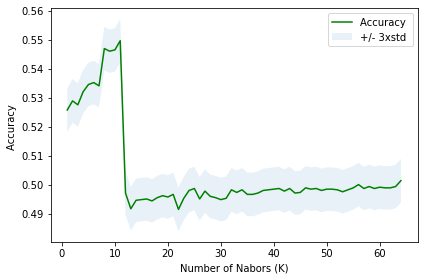

In [50]:
# visulazing what K is optimum
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [51]:
# prepare to run with K65
k = 65
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=65)

In [52]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 1, 1, 1, 1])

In [53]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5098647125140925
Test set Accuracy:  0.4981965734896303


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[1815    0]
 [   0    0]]


Confusion matrix, without normalization
[[1815    0]
 [   0    0]]


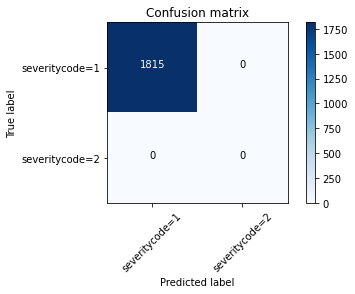

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severitycode=1','severitycode=2'],normalize= False,  title='Confusion matrix')

In [56]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.50      0.82      0.62      2214
           2       0.50      0.18      0.26      2222

    accuracy                           0.50      4436
   macro avg       0.50      0.50      0.44      4436
weighted avg       0.50      0.50      0.44      4436



In [57]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier

In [58]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [59]:
accTree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
accTree.fit(X_trainset,y_trainset)
accTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [60]:
predTree = accTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

[1 2 1 1 2]
[2 1 2 2 1]


In [61]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.5662107320006012


In [62]:
#LOGISTIC REGRESSION
import pylab as pl
import scipy.optimize as opt

In [63]:
Xr = np.asarray(df23[['Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Wet', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk']])

Xr[0:5]

array([[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
      dtype=uint8)

In [64]:
yr = np.asarray(df23['SEVERITYCODE'])
yr [0:5]

array([2, 2, 2, 2, 2])

In [65]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split( Xr, yr, test_size=0.2, random_state=4)
print ('Train set:', Xr_train.shape,  yr_train.shape)
print ('Test set:', Xr_test.shape,  yr_test.shape)

Train set: (17740, 19) (17740,)
Test set: (4436, 19) (4436,)


In [66]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(Xr_train,yr_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [67]:
# Now we can predict using our test set
yhatr = LR.predict(Xr_test)
yhatr

array([2, 2, 2, ..., 1, 1, 2])

In [68]:
# predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of severity code 1 and second column is probability of severity code 2
yhatr_prob = LR.predict_proba(Xr_test)
yhatr_prob

array([[0.46, 0.54],
       [0.49, 0.51],
       [0.44, 0.56],
       ...,
       [0.56, 0.44],
       [0.55, 0.45],
       [0.44, 0.56]])

In [69]:
from sklearn.metrics import jaccard_score
jaccard_score(yr_test, yhatr)

0.3559870550161812

In [70]:
print (classification_report(yr_test, yhatr))

              precision    recall  f1-score   support

           1       0.56      0.50      0.53      2214
           2       0.55      0.61      0.57      2222

    accuracy                           0.55      4436
   macro avg       0.55      0.55      0.55      4436
weighted avg       0.55      0.55      0.55      4436



In [71]:
from sklearn.metrics import log_loss
log_loss(yr_test, yhatr_prob)

0.6863848211685584

In [72]:
# SUPPORT VECTOR MACHINE

In [73]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(Xr_train, yr_train)

SVC()

In [74]:
yhat2 = clf.predict(Xr_test)
yhat2 [0:5]

array([2, 1, 2, 1, 1])

In [75]:
from sklearn.metrics import f1_score
f1_score(yr_test, yhat2, average='weighted') 

0.5529758127604528

In [76]:
jaccard_score(yr_test, yhat2)

0.3814722395508422

In [78]:
df24 = df23[['SEVERITYCODE', 'Clear', 'Dry', 'Daylight']]
df24.head()

,SEVERITYCODE,Clear,Dry,Daylight
8,2,1,1,1
44,2,0,0,0
72,2,1,1,1
85,2,1,1,1
91,2,1,1,1


In [79]:
Feature_1 = df24[['Clear', 'Dry', 'Daylight']]
Feature_1.shape

(22176, 3)

In [80]:
X_1 = Feature_1
X_1[0:5]

,Clear,Dry,Daylight
8,1,1,1
44,0,0,0
72,1,1,1
85,1,1,1
91,1,1,1


In [82]:
y_1 = df24["SEVERITYCODE"].values
y_1[0:5]

array([2, 2, 2, 2, 2])

In [83]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split( X_1, y_1, test_size=0.2, random_state=4)
print ("Train set:", X_1_train.shape, y_1_train.shape)
print ("Test set:", X_1_test.shape, y_1_test.shape)

Train set: (17740, 3) (17740,)
Test set: (4436, 3) (4436,)


In [88]:
Ks = 50
mean_acc_1 = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_1_train,y_1_train)
    yhat_1=neigh.predict(X_1_test)
    mean_acc_1[n-1] = metrics.accuracy_score(y_1_test, yhat_1)
    
    std_acc[n-1]=np.std(yhat_1==y_1_test)/np.sqrt(yhat_1.shape[0])
    
mean_acc_1

array([0.47, 0.49, 0.49, 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.47, 0.48, 0.48,
       0.48, 0.48, 0.48, 0.48, 0.5 , 0.49, 0.5 , 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55])

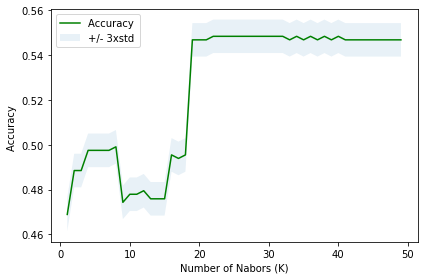

In [89]:
plt.plot(range(1,Ks),mean_acc_1,'g')
plt.fill_between(range(1,Ks),mean_acc_1 - 1 * std_acc,mean_acc_1 + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [90]:
k = 25
neigh_1 = KNeighborsClassifier(n_neighbors = k).fit(X_1_train,y_1_train)
neigh_1

KNeighborsClassifier(n_neighbors=25)

In [91]:
yhat_1 = neigh_1.predict(X_1_test)
yhat_1[0:5]

array([2, 2, 2, 1, 1])

In [92]:
print("Train set Accuracy: ", metrics.accuracy_score(y_1_train, neigh_1.predict(X_1_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_1_test, yhat_1))

Train set Accuracy:  0.5541713641488162
Test set Accuracy:  0.5484670874661858
